# Fashion MNIST 


* Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples.

* Each example is a 28x28 grayscale image, associated with a label from 10 classes.

* Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms.

* It shares the same image size and structure of training and testing splits.

DataSet Link -> https://github.com/zalandoresearch/fashion-mnist



In [9]:
# Replace "widget" with "inline" or "notebook", if necessary
%matplotlib inline
%load_ext nb_black


import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA, FastICA
from sklearn.linear_model import LogisticRegression

import xgboost as xgb
from xgboost.sklearn import XGBClassifier

import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from keras.utils import to_categorical
from keras.datasets import fashion_mnist

from sklearn.metrics import confusion_matrix
import seaborn as sns

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

Then, load the dataset (if this is the first time you're doing this, you will need a network connection).

## Importing Image 

In [10]:
(x3_train, y_train), (x3_test, y_test) = fashion_mnist.load_data()
n_classes = np.max(y_train) + 1

<IPython.core.display.Javascript object>

In [11]:
# Vectorize image arrays, since most methods expect this format
x_train = x3_train.reshape(x3_train.shape[0], np.prod(x3_train.shape[1:]))
x_test = x3_test.reshape(x3_test.shape[0], np.prod(x3_test.shape[1:]))
x_test.shape

(10000, 784)

<IPython.core.display.Javascript object>

In [12]:
# Binary vector representation of targets (for one-hot or multinomial output networks)
y3_train = to_categorical(y_train)
y3_test = to_categorical(y_test)

<IPython.core.display.Javascript object>

In [13]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

<IPython.core.display.Javascript object>

| Label | Class | 
| --- | --- |
| 0 | T-shirt/top | 
| 1 | Trouser | 
| 2 | Pullover | 
| 3 | Dress | 
| 4 | Coat | 
| 5 | Sandal | 
| 6 | Shirt | 
| 7 | Sneaker | 
| 8 | Bag | 
| 9 | Ankle boot | 


In [14]:
dict_type = {
    "T-shirt/top": 0,
    "Trouser": 1,
    "Pullover": 2,
    "Dress": 3,
    "Coat": 4,
    "Sandal": 5,
    "Shirt": 6,
    "Sneaker": 7,
    "Bag": 8,
    "Ankle boot": 9,
}


reverse_map = {v: k for k, v in dict_type.items()}
print(reverse_map)

{0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}


<IPython.core.display.Javascript object>

Next, we shall define some auxiliary functions for inspecting the image data.

In [15]:
def show_images(images, cols=5, cmap=plt.cm.gray, im_shape=None, fig=None):
    """Display a set of images.
    
    images: Either a (N,K) or (N,K,L) array. If 2D, then each row will be reshaped to a rectangle.
    im_shape: If images is 2D, the shape of each image. If omitted, defaults to (sqrt(K),sqrt(K)).
    cols: Number of columns in subplots; rows is ceil(N/cols).
    cmap: Colormap to use."""
    if fig is None:
        fig = plt.figure()
    dims = images.shape
    if len(dims) not in (2, 3):
        raise ValueError("images must be either 2D or 3D array")
    if len(dims) == 3:
        if im_shape is not None:
            raise ValueError("im_shape redundant when images is a 3D array")
        else:
            im_shape = dims[1:]
    if len(dims) == 2 and im_shape is None:
        L = int(np.sqrt(dims[1]))
        if L * L != dims[1]:
            raise ValueError(
                "im_shape is missing and number of columns not a perfect square"
            )
        im_shape = (L, L)
    N = dims[0]
    rows = (N + cols - 1) // cols
    for i in range(N):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_xticks([])
        ax.set_yticks([])
        # ax.title('Training: %i\n' % labels[y_str[i]], fontsize = 20)
        ax.imshow(images[i, ...].reshape(im_shape), cmap=cmap)
        # ax.xlabel(lables[y_str[i]])

<IPython.core.display.Javascript object>

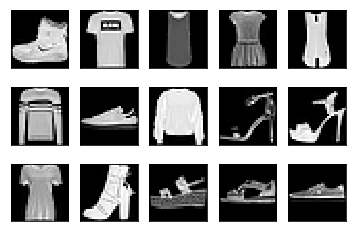

<IPython.core.display.Javascript object>

In [16]:
show_images(x3_train[0:15, ...])

In [31]:
train_dim = x3_train.shape
test_dim = x3_test.shape
print("Number of Images in Train Set: %d, Pixels of each image: %d * %d" % train_dim)
print("Number of Images in Test Set:  %d, Pixels of each image: %d * %d" % test_dim)

Number of Images in Train Set: 60000, Pixels of each image: 28 * 28
Number of Images in Test Set:  10000, Pixels of each image: 28 * 28


<IPython.core.display.Javascript object>

---
## 1. Logistic regression 

### a. L1 Penalty 
Training a logistic regression model on the raw images, using ``scikit-learn``, and report training and test errors. 



In [32]:
# l1
l_one = LogisticRegression(solver="saga", multi_class="multinomial", penalty="l1")
l_one.fit(x_train, y_train)
print("Train score: %f" % l_one.score(x_train, y_train))
print("Test score: %f" % l_one.score(x_test, y_test))

/Users/shradhitsubudhi/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Train score: 0.877317
Test score: 0.838900


<IPython.core.display.Javascript object>

In [6]:
y_pred_l1 = l_one.predict(x_test)

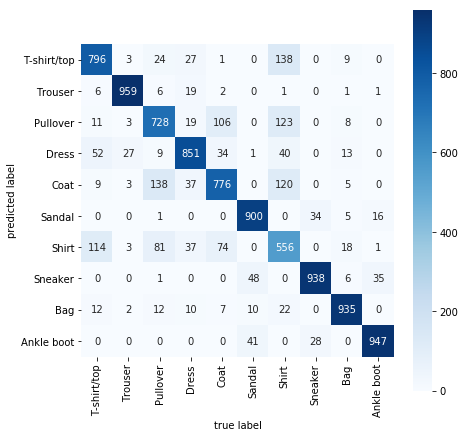

In [9]:
mat = confusion_matrix(y_test, y_pred_l1)
plt.figure(figsize=(7, 7))

sns.heatmap(mat.T, xticklabels=dict_type.keys(),
            annot=True,fmt="d",square=True, yticklabels=dict_type.keys(), cmap="Blues")
plt.xlabel('true label')
plt.ylabel('predicted label');


### b. L2 Penalty 

**Default is Ridge Regression - l2**


In [114]:

lr = LogisticRegression(solver='lbfgs', multi_class='multinomial')
lr.fit(x_train, y_train)
print("Train score: %f" % lr.score(x_train, y_train))
print("Test score: %f" % lr.score(x_test, y_test))

/Users/shradhitsubudhi/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Train score: 0.863183
Test score: 0.841200


In [153]:
y_pred_l2 = lr.predict(x_test)

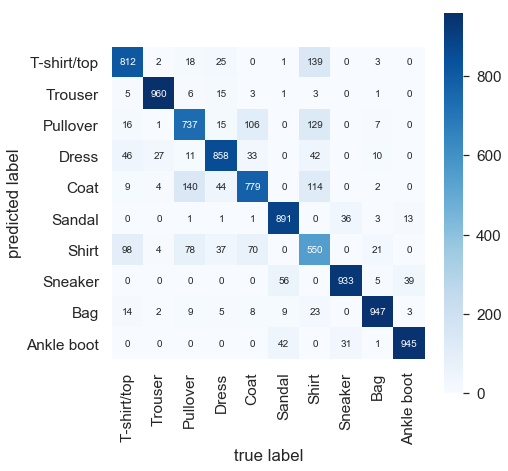

In [154]:
mat = confusion_matrix(y_test, y_pred_l2)
plt.figure(figsize=(7, 7))

sns.heatmap(mat.T, xticklabels=dict_type.keys(),
            annot=True,fmt="d",square=True, yticklabels=dict_type.keys(), cmap="Blues")
plt.xlabel('true label')
plt.ylabel('predicted label');

## 2. Logistic regression on PCA and ICA features

Training the logistic regression on the top-$K$ principal component features and examine it's training and test error.  

In [19]:
x3_train.shape

In [21]:

lr = LogisticRegression(solver='lbfgs', multi_class='multinomial',max_iter = 10000)

lr.fit(x_transformed, y_train)
print("Train score: %f" % lr.score(x_transformed, y_train))
print("Test score: %f" % lr.score(x_transformed_test, y_test))




Train score: 0.843083
Test score: 0.435200


Next, we did the same on the top-$K$ independent component features, and answer the same questions.

In [7]:
img_rows = x3_train.shape[1]
img_cols = x3_train.shape[2]

x_train_conv = x_train.reshape(x3_train.shape[0], img_rows, img_cols, 1)
x_test_conv = x_test.reshape(x3_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

# more reshaping
x_train_conv = x_train_conv.astype("float32")
x_test_conv = x_test_conv.astype("float32")
x_train_conv /= 255
x_test_conv /= 255
print("x_train shape:", x_train_conv.shape)
print("Number of images in x_train_conv", x_train_conv.shape[0])
print("Number of images in x_test_conv", x_test_conv.shape[0])

In [8]:
img_rows = x3_train.shape[1]
img_cols = x3_train.shape[2]

x_train_conv = x_train.reshape(x3_train.shape[0], img_rows, img_cols, 1)
x_test_conv = x_test.reshape(x3_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

# more reshaping
x_train_conv = x_train_conv.astype("float32")
x_test_conv = x_test_conv.astype("float32")
x_train_conv /= 255
x_test_conv /= 255
print("x_train shape:", x_train_conv.shape)
print("Number of images in x_train_conv", x_train_conv.shape[0])
print("Number of images in x_test_conv", x_test_conv.shape[0])

Train score: 0.807450
Test score: 0.111100


-----

## 3. Cross validation for Logistic Regression 

Using ten-fold cross-validation to select a good $L_2$-norm regularization strength. 

In [13]:
from sklearn.linear_model import LogisticRegressionCV

searchCV = LogisticRegressionCV(
        Cs=list(np.power(10.0, np.arange(-5, 5)))
        ,cv = 10
        ,max_iter = 10000
        ,solver = 'saga'
        ,tol=10
        ,multi_class ="multinomial"
        )
searchCV.fit(x_train, y_train)

LogisticRegressionCV(Cs=[1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0],
           class_weight=None, cv=10, dual=False, fit_intercept=True,
           intercept_scaling=1.0, max_iter=10000,
           multi_class='multinomial', n_jobs=None, penalty='l2',
           random_state=None, refit=True, scoring=None, solver='saga',
           tol=10, verbose=0)

In [33]:
box_plot = searchCV.scores_[0]
# print(box_plot)

<IPython.core.display.Javascript object>

In [15]:
index = searchCV.Cs_
index

array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02,
       1.e+03, 1.e+04])

In [16]:
#import seaborn
#seaborn.boxplot(x =  y = box_plot, whis = 1)
import pandas as pd
df = pd.DataFrame({'1.e-05':box_plot[:,0], '1.e-04':box_plot[:,1], '1.e-03':box_plot[:,2], '1.e-02': box_plot[:,3],
                       '1.e-01':box_plot[:,4], '1.e-00':box_plot[:,5],'1.e+01':box_plot[:,6], '1.e+02':box_plot[:,7], 
                        '1.e+03':box_plot[:,8], '1.e+04':box_plot[:,9] })
df.head()

,1.e-05,1.e-04,1.e-03,1.e-02,1.e-01,1.e-00,1.e+01,1.e+02,1.e+03,1.e+04
0,0.847667,0.848500,0.852000,0.851167,0.853000,0.852333,0.851833,0.851500,0.851500,0.852000
1,0.842500,0.853667,0.854333,0.857333,0.856000,0.857167,0.857333,0.858500,0.857500,0.858500
2,0.837500,0.840333,0.842167,0.843833,0.843833,0.845333,0.844833,0.844833,0.845000,0.844333
3,0.838667,0.847333,0.850667,0.851500,0.852167,0.851667,0.850167,0.849500,0.849667,0.849167
4,0.845667,0.848833,0.855833,0.856333,0.856833,0.857833,0.858667,0.858167,0.857167,0.857333


Ploting the cross-validation scores against parameter value, using a [box plot](https://matplotlib.org/gallery/statistics/boxplot_demo.html).

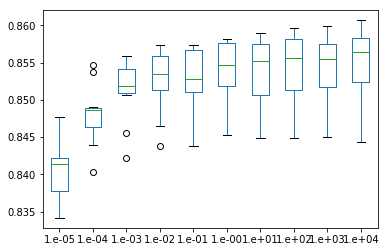

In [17]:
img_rows = x3_train.shape[1]
img_cols = x3_train.shape[2]

x_train_conv = x_train.reshape(x3_train.shape[0], img_rows, img_cols, 1)
x_test_conv = x_test.reshape(x3_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

# more reshaping
x_train_conv = x_train_conv.astype("float32")
x_test_conv = x_test_conv.astype("float32")
x_train_conv /= 255
x_test_conv /= 255
print("x_train shape:", x_train_conv.shape)
print("Number of images in x_train_conv", x_train_conv.shape[0])
print("Number of images in x_test_conv", x_test_conv.shape[0])

In [18]:
x3_train

1.e-05    0.840683
1.e-04    0.848100
1.e-03    0.851267
1.e-02    0.852500
1.e-01    0.852983
1.e-00    0.854017
1.e+01    0.853983
1.e+02    0.854283
1.e+03    0.854383
1.e+04    0.854733
dtype: float64

**At L2 = 1/ 1.e+04, we get the highest CV score of - 0.8547**


-------

## 4. Decision Tree Classifier  

In [11]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(max_depth = 30, random_state=0)
dt_classifier.fit(x_train, y_train)

print("Train score: %f" % dt_classifier.score(x_train, y_train))
print("Test score: %f" % dt_classifier.score(x_test, y_test))

Train score: 0.997767
Test score: 0.790200


In [16]:
y_pred_dt = dt_classifier.predict(x_test)

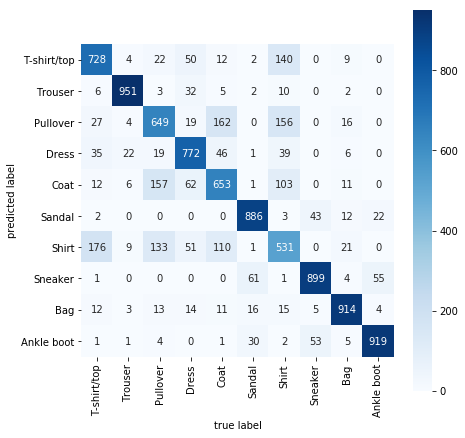

In [19]:
mat = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(7, 7))

sns.heatmap(mat.T, xticklabels=dict_type.keys(),
            annot=True,fmt="d",square=True, yticklabels=dict_type.keys(), cmap="Blues")
plt.xlabel('true label')
plt.ylabel('predicted label');

-------

## 5. XGBoost Classifier 

In [23]:
model = XGBClassifier()
model.fit(x_train, y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [24]:
print("Train score: %f" % model.score(x_train, y_train))
print("Test score: %f" % model.score(x_test, y_test))

Train score: 0.881550
Test score: 0.858200


In [26]:
y_pred_xg = model.predict(x_test)

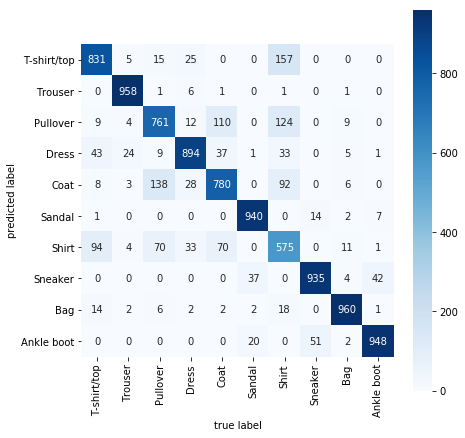

In [27]:
mat = confusion_matrix(y_test, y_pred_xg)
plt.figure(figsize=(7, 7))

sns.heatmap(mat.T, xticklabels=dict_type.keys(),
            annot=True,fmt="d",square=True, yticklabels=dict_type.keys(), cmap="Blues")
plt.xlabel('true label')
plt.ylabel('predicted label');

----
## 6) Building LogisticRegression using Keras


Train a neural network that performs multi-class logistic regression, and compare it's performance against the Scikit-learn model.  

In [6]:
#pre-processing & normalization of the data inputs 
x_train = x_train.astype('float32') 
x_test = x_test.astype('float32') 
x_train /= 255 
x_test /= 255


In [7]:
output_dim = nb_classes = len(np.unique(y_train))
input_dim = x_train.shape[1]

model = Sequential() 
model.add(Dense(output_dim, input_dim = input_dim, activation='softmax',kernel_regularizer = L1L2(l1=0, l2 = 0.01))) 
batch_size = 50
nb_epoch = 40
model.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics=['accuracy']) 
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [8]:
#model.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics=['accuracy']) 
history = model.fit(x_train, y3_train, batch_size = batch_size, epochs = nb_epoch, verbose = 1, validation_data = (x_test, y3_test)) 


Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/40
60000/60000 [==============================] - 1s 16us/step - loss: 1.1366 - acc: 0.7118 - val_loss: 0.9398 - val_acc: 0.7611
Epoch 2/40
60000/60000 [==============================] - 1s 15us/step - loss: 0.8682 - acc: 0.7901 - val_loss: 0.8492 - val_acc: 0.7861
Epoch 3/40
60000/60000 [==============================] - 1s 14us/step - loss: 0.8063 - acc: 0.8057 - val_loss: 0.8054 - val_acc: 0.7994
Epoch 4/40
60000/60000 [==============================] - 1s 14us/step - loss: 0.7733 - acc: 0.8135 - val_loss: 0.7840 - val_acc: 0.8022
Epoch 5/40
60000/60000 [==============================] - 1s 15us/step - loss: 0.7542 - acc: 0.8172 - val_loss: 0.7682 - val_acc: 0.8093
Epoch 6/40
60000/60000 [==============================] - 1s 14us/step - loss: 0.7416 - acc: 0.8197 - val_loss: 0.7561 - val_acc: 0.8119
Epoch 7/40
60000/60000 [==============================] - 1s 14us/step - loss: 0

In [9]:
score = model.evaluate(x_test, y3_test) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

10000/10000 [==============================] - 0s 9us/step
Test score: 0.7275552978515625
Test accuracy: 0.8078


## 7. Convolutional networks

**Pre-processing the data for Convolutional Neural Network**

In [19]:
x3_train.shape

(60000, 28, 28)

<IPython.core.display.Javascript object>

In [17]:
img_rows = x3_train.shape[1]
img_cols = x3_train.shape[2]

x_train_conv = x_train.reshape(x3_train.shape[0], img_rows, img_cols, 1)
x_test_conv = x_test.reshape(x3_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

#more reshaping
x_train_conv = x_train_conv.astype('float32')
x_test_conv = x_test_conv.astype('float32')
x_train_conv /= 255
x_test_conv /= 255
print('x_train shape:', x_train_conv.shape)
print('Number of images in x_train_conv', x_train_conv.shape[0])
print('Number of images in x_test_conv', x_test_conv.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train_conv 60000
Number of images in x_test_conv 10000


<IPython.core.display.Javascript object>

In [20]:
# Creating a Sequential Model and adding the layers
modelc = Sequential()
modelc.add(Conv2D(28, kernel_size=(3, 3), input_shape=input_shape))
modelc.add(MaxPooling2D(pool_size=(2, 2)))
modelc.add(Flatten())  # Flattening the 2D arrays for fully connected layers
modelc.add(Dense(128, activation=tf.nn.relu))
modelc.add(Dropout(0.2))
modelc.add(Dense(10, activation=tf.nn.softmax))
modelc.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)
modelc.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 28)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4732)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               605824    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)      

<IPython.core.display.Javascript object>

In [18]:
modelc.fit(x = x_train_conv, y = y_train, epochs = 15)
#y3_train.shape

Epoch 1/15
60000/60000 [==============================] - 11s 183us/step - loss: 0.1040 - acc: 0.9609
Epoch 2/15
60000/60000 [==============================] - 11s 184us/step - loss: 0.0955 - acc: 0.9636
Epoch 3/15
60000/60000 [==============================] - 11s 184us/step - loss: 0.0870 - acc: 0.9675
Epoch 4/15
60000/60000 [==============================] - 11s 185us/step - loss: 0.0835 - acc: 0.9689
Epoch 5/15
60000/60000 [==============================] - 11s 184us/step - loss: 0.0793 - acc: 0.9706
Epoch 6/15
60000/60000 [==============================] - 11s 184us/step - loss: 0.0765 - acc: 0.9716
Epoch 7/15
60000/60000 [==============================] - 11s 186us/step - loss: 0.0694 - acc: 0.9738
Epoch 8/15
60000/60000 [==============================] - 11s 185us/step - loss: 0.0674 - acc: 0.9747
Epoch 9/15
60000/60000 [==============================] - 11s 188us/step - loss: 0.0623 - acc: 0.9770
Epoch 10/15
60000/60000 [==============================] - 11s 188us/step - loss: 

In [55]:
score = modelc.evaluate(x_test_conv, y_test)

10000/10000 [==============================] - 1s 67us/step


In [59]:
print("Model Accuracy : %f " % score[1])

Model Accuracy : 0.914200 



\begin{array}{rr} \hline
MODEL & Test \\ \hline
Logistic Regression (L1) &0.83 \\ \hline
Logistic Regression (L2) &0.84  \\ \hline
Decision Tree & 0.79  \\ \hline
XGBoost & 0.85  \\ \hline
Logistic Regression (Keras) & 0.80  \\ \hline
Logistic Regression - PCA & 0.44  \\ \hline
Logistic Regression - FastICA & 0.11  \\ \hline
Convolutional Neural Network &0.91\\ \hline
\end{array}